## Exercício 1

<h2 style="color:#c62828;">
Exercício 1 — Wagner + Integral de Duhamel (entrada harmônica)
</h2>

<hr style="border:1px solid #ddd;">

<h3>📌 Objetivo do enunciado</h3>
<p>
Usar a <b>função de deficiência de Wagner</b> e a <b>integral de Duhamel</b> para obter a sustentação
quando a velocidade normal induzida é harmônica:
</p>

<p style="text-align:center;">
<b>w(t) = w<sub>a</sub> sin(ωt)</b>
</p>

<p>
Empregar o tempo adimensional <b>τ</b> (semi-cordas viajadas) e traçar <b>L(t)</b>
para vários valores do parâmetro reduzido:
</p>

<p style="text-align:center;">
<b>k = ωb / V</b> &nbsp; com &nbsp; <b>b = c/2</b>
</p>

<hr style="border:1px solid #ddd;">

<h3>1.1 Modelo (circulatório via Wagner)</h3>

<p>
Para um aerofólio fino 2D, a sustentação circulatória em resposta a uma variação temporal do ângulo efetivo
<b>α(τ)</b> pode ser escrita pela integral de Duhamel como:
</p>

<p style="text-align:center;">
<b>
C<sub>L</sub>(τ) = c<sub>lα</sub>
[
α(0) Φ(τ) + ∫<sub>0</sub><sup>τ</sup> Φ(τ − ξ) (dα(ξ)/dξ) dξ
]
</b>
</p>

<p>
onde <b>Φ(τ)</b> é a <b>função de Wagner</b> (deficiência), e o tempo adimensional é:
</p>

<p style="text-align:center;">
<b>τ = Vt / b</b> &nbsp; com &nbsp; <b>b = c/2</b>
</p>

<hr style="border:1px solid #ddd;">

<h3>Relação entre w(t) e α(t)</h3>

<p>
Como <b>w(t)</b> é uma velocidade normal induzida, para pequenos ângulos pode-se usar:
</p>

<p style="text-align:center;">
<b>α(t) ≈ w(t)/V</b>
</p>

<p>
Logo, em função de <b>τ</b>:
</p>

<p style="text-align:center;">
<b>
α(τ) = (w<sub>a</sub>/V) sin(ωt) = (w<sub>a</sub>/V) sin(kτ)
</b>
</p>

<p>
pois:
</p>

<p style="text-align:center;">
<b>ωt = ω (bτ/V) = kτ</b>
</p>

<hr style="border:1px solid #ddd;">

<h3>Função de Wagner (aproximação clássica)</h3>

<p>
Uma aproximação amplamente usada em aeroelasticidade é:
</p>

<p style="text-align:center;">
<b>
Φ(τ) = 1 − 0.165 e<sup>−0.0455τ</sup> − 0.335 e<sup>−0.3τ</sup>
</b>
</p>

<hr style="border:1px solid #ddd;">

<h3>Conversão de C<sub>L</sub>(t) para sustentação por unidade de envergadura</h3>

<p>
Depois de obter <b>C<sub>L</sub>(t)</b>, converte-se para sustentação por unidade de envergadura:
</p>

<p style="text-align:center;">
<b>
L′(t) = ½ ρ V² c · C<sub>L</sub>(t)
</b>
</p>

<hr style="border:1px solid #ddd;">

<p style="font-size:0.95em; color:#555;">
<b>Observação:</b> o enunciado pede “desprezar o termo w<sub>0</sub>”.
Aqui a entrada é puramente senoidal (média zero), portanto não existe componente constante.
</p>


<h2 style="color:#c62828;">
1.2 Código Python (integra simbolicamente e plota)
</h2>

<hr style="border:1px solid #ddd;">

<p>
O enunciado pede explicitamente entregar <b>código</b> que resolva a integral <b>simbolicamente</b> e gere o gráfico.
Abaixo segue um script completo usando <b>Sympy + NumPy + Matplotlib</b>.
</p>

<p>
O parâmetro <b>w<sub>a</sub></b> foi mantido como entrada (se não for dado no enunciado, você escolhe;
o resultado escala linearmente com <b>w<sub>a</sub></b>).
</p>

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [4]:

# =========================
# Dados do enunciado
# =========================
rho = 1.225          # kg/m^3
c = 2.0              # m
V = 200.0            # m/s
cl_alpha = 2*np.pi   # 1/rad
b = c/2              # semi-corda


In [5]:


# Amplitude de w(t) (não foi especificada no PDF; escolha típica)
wa = 1.0  # m/s  (mude se quiser)

# Frequências reduzidas pedidas
k_list = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0]

# =========================
# Símbolos e funções
# =========================
tau = sp.Symbol('tau', real=True, nonnegative=True)
xi = sp.Symbol('xi', real=True, nonnegative=True)
k = sp.Symbol('k', positive=True, real=True)

# Wagner (aprox. padrão)
Phi = 1 - sp.Rational(165,1000)*sp.exp(-sp.Rational(455,10000)*tau) - sp.Rational(335,1000)*sp.exp(-sp.Rational(3,10)*tau)

# alpha(tau) = (wa/V) sin(k tau)
A = wa / V
alpha = A * sp.sin(k * tau)
dalpha_dxi = sp.diff(A * sp.sin(k * xi), xi)

# Duhamel (forma geral)
Phi_shift = (1 - sp.Rational(165,1000)*sp.exp(-sp.Rational(455,10000)*(tau-xi))
               - sp.Rational(335,1000)*sp.exp(-sp.Rational(3,10)*(tau-xi)))

CL_tau = cl_alpha * (alpha.subs(tau, 0) * (Phi.subs(tau, tau)) + sp.integrate(Phi_shift * dalpha_dxi, (xi, 0, tau)))
CL_tau_simpl = sp.simplify(CL_tau)

print("C_L(tau) simbólico (simplificado):")
sp.pprint(CL_tau_simpl)

# Converter para função numérica
CL_func = sp.lambdify((tau, k), CL_tau_simpl, modules=["numpy"])

# Sustentação por unidade de envergadura
q = 0.5 * rho * V**2
def Lprime(tau_vals, k_val):
    return q * c * CL_func(tau_vals, k_val)



C_L(tau) simbólico (simplificado):
⎛                         7237⋅τ                                     7237⋅τ    ↪
⎜                         ──────                                     ──────    ↪
⎜                      3   2000                                   2   2000     ↪
⎝4.02123859659494e+22⋅k ⋅ℯ      ⋅sin(k⋅τ) - 8.68647855443455e+21⋅k ⋅ℯ      ⋅co ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                   6637⋅τ                           3573⋅τ    ↪
↪                                   ──────                           ──────    ↪
↪                                2   2000                         2   1000     ↪
↪ s(k⋅τ) + 8.08268957915582e+21⋅k ⋅ℯ       + 6.0378897527873e+20⋅k ⋅ℯ       +  ↪
↪ ───────────────────────────────────────────────────────────────────────

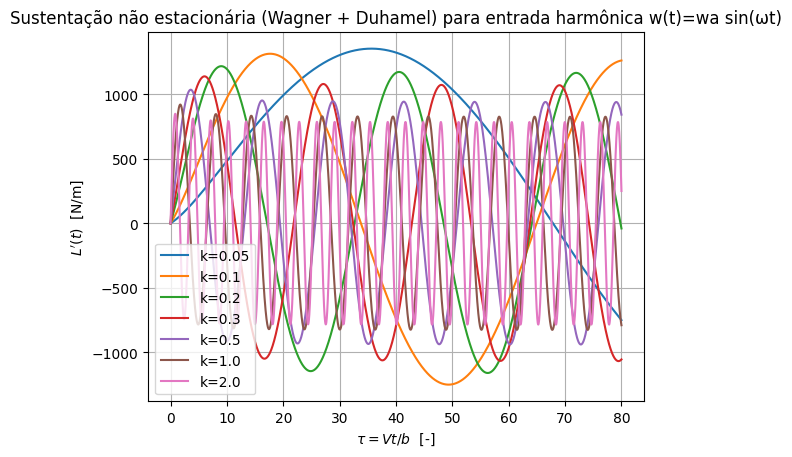

In [6]:

# =========================
# Plot no domínio do tempo
# =========================
# Escolha de janela de tempo: em tau
tau_max = 80.0
tau_vals = np.linspace(0, tau_max, 3000)

plt.figure()
for kv in k_list:
    plt.plot(tau_vals, Lprime(tau_vals, kv), label=f"k={kv}")

plt.xlabel(r"$\tau = Vt/b$  [-]")
plt.ylabel(r"$L'(t)$  [N/m]")
plt.title("Sustentação não estacionária (Wagner + Duhamel) para entrada harmônica w(t)=wa sin(ωt)")
plt.grid(True)
plt.legend()
plt.show()

<h3>📈 O que deve ser observado no gráfico</h3>

<ul>
<li>
<b>Para k pequeno</b> (variação lenta do escoamento), a sustentação acompanha de perto
o comportamento <b>quase-estacionário</b>, com pequena defasagem e amplitude próxima
à solução estacionária.
</li>

<li>
<b>Para k grande</b>, tornam-se evidentes os efeitos <b>não estacionários</b>:
ocorre uma <b>redução da amplitude</b> da sustentação e um <b>atraso de fase</b>
em relação à excitação harmônica, características típicas da resposta descrita
pela função de Wagner.
</li>
</ul>


## Exercício 2

<h2 style="color:#c62828;">
2. Exercício 2 — Função de Theodorsen C(k) e termos não-circulatórios
</h2>

<hr style="border:1px solid #ddd;">

<h3>📌 Objetivo do enunciado</h3>

<p>
Explicar o processo de determinação da <b>função de Theodorsen C(k)</b> e por que a
<b>sustentação não é composta apenas pela parte circulatória</b>, destacando a
importância dos <b>termos não-circulatórios</b> e dos potenciais associados.
</p>

<hr style="border:1px solid #ddd;">

<h3>2.1 Como se determina C(k) — ideia física e matemática</h3>

<p>
Assume-se que o aerofólio realiza um <b>movimento harmônico</b> (por exemplo, mergulho e/ou arfagem),
de modo que todas as grandezas variam como:
</p>

<p style="text-align:center;">
<b>e<sup>iωt</sup></b>
</p>

<p>
O escoamento é modelado como <b>potencial e linearizado</b>, impondo:
</p>

<ul>
<li>condição de <b>não-penetração</b> no aerofólio;</li>
<li>condição de <b>Kutta</b> no bordo de fuga;</li>
<li>presença de uma <b>esteira</b> que transporta vorticidade “solta” a jusante.</li>
</ul>

<p>
A solução desse problema mostra que a <b>circulação ligada Γ(t)</b> não acompanha
instantaneamente o movimento do aerofólio: a esteira atua como um
<b>filtro dinâmico</b>, introduzindo atraso de fase e redução de amplitude.
</p>

<p>
Esse efeito é representado por uma <b>função complexa do parâmetro reduzido</b>:
</p>

<p style="text-align:center;">
<b>k = ωb / V</b>
</p>

<p>
A chamada <b>função de Theodorsen C(k)</b> multiplica os termos circulatórios e
representa exatamente essa filtragem induzida pela esteira.
</p>

<p>
Na forma clássica, o resultado final pode ser escrito em termos de funções de Hankel:
</p>

<p style="text-align:center;">
<b>
C(k) = H<sub>1</sub><sup>(2)</sup>(k) / [ H<sub>1</sub><sup>(2)</sup>(k) + i H<sub>0</sub><sup>(2)</sup>(k) ]
</b>
</p>

<p>
onde <b>H<sub>n</sub><sup>(2)</sup></b> são funções de Hankel de segunda espécie.
</p>

<hr style="border:1px solid #ddd;">

<h3>2.2 Por que a sustentação não é apenas circulatória?</h3>

<p>
Além da parcela associada à <b>circulação</b> (ligada à esteira e à condição de Kutta),
existe uma contribuição <b>não-circulatória</b>, também conhecida como:
</p>

<ul>
<li><b>massa adicionada</b> (<i>added mass</i>);</li>
<li><b>termos inerciais do fluido</b>;</li>
<li>contribuição <b>impulsiva</b>, associada a acelerações do movimento.</li>
</ul>

<p>
Esses termos surgem do chamado <b>potencial de aceleração</b>:
mesmo na ausência de circulação, acelerar um corpo no fluido implica
<b>acelerar uma parcela de fluido ao redor</b>, o que gera força aerodinâmica.
</p>

<hr style="border:1px solid #ddd;">

<h3>2.3 Importância dos termos não-circulatórios</h3>

<p>
Os termos não-circulatórios tornam-se especialmente importantes em
<b>altas frequências</b> (valores maiores de <b>k</b>), quando as acelerações são elevadas.
</p>

<p>
Eles são essenciais para:
</p>

<ul>
<li>prever corretamente a <b>fase e a amplitude</b> das forças aerodinâmicas;</li>
<li>análises de <b>flutter</b>, pois influenciam o amortecimento efetivo e os acoplamentos aeroelásticos;</li>
<li>modelar a resposta a <b>rajadas</b> e <b>manobras rápidas</b>.</li>
</ul>

<hr style="border:1px solid #ddd;">

<p style="font-style:italic;">
Resumo em uma frase: <b>circulatório</b> corresponde ao efeito da esteira e da circulação,
enquanto o <b>não-circulatório</b> representa a inércia do fluido (massa adicionada).
</p>


## Exercício 3

<h2 style="color:#c62828;">
 3. Exercício 3 — Seção típica 2DOF (quase-estacionária e não-estacionária com k = 0.25)
</h2>

<hr style="border:1px solid #ddd;">

<h3>📌 O que o enunciado pede</h3>

<p>
O enunciado fornece parâmetros de uma <b>seção típica</b> (massa, inércia, posições
<b>X<sub>cg</sub></b>, <b>X<sub>ce</sub></b>, frequências naturais, etc.) e solicita:
</p>

<ul>
<li>montar <b>simbolicamente</b> as matrizes <b>A, B, C, D, E</b> do sistema aeroelástico;</li>
<li>substituir valores, obter <b>modos</b> e <b>frequências naturais</b>, e discutir a <b>complexidade dos modos</b>;</li>
<li>obter a <b>resposta temporal</b> com condição inicial em <b>h</b> e <b>θ</b>;</li>
<li>repetir tudo para o caso <b>não-estacionário</b> usando <b>Theodorsen</b> com <b>k = 0.25</b>.</li>
</ul>

<hr style="border:1px solid #ddd;">

<h3>⚠️ Observação sobre a notação “A, B, C, D, E”</h3>

<p>
Diferentes cursos/livros usam convenções diferentes para “A–E”
(por exemplo, forma polinomial <b>Aλ⁴ + Bλ³ + …</b> ou forma de 2ª ordem
<b>M q¨ + C q˙ + K q = 0</b>).
</p>

<p>
Aqui será usada uma implementação <b>padrão e completa</b> na forma de 2ª ordem:
</p>

<p style="text-align:center;">
<b>M q¨ + C q˙ + K q = 0</b>
</p>

<p>
e em seguida convertida para <b>1ª ordem (state-space)</b> para obtenção de modos e simulação temporal.
</p>

<hr style="border:1px solid #ddd;">

<h3>3.1 Definições e parâmetros (do enunciado)</h3>

<ul>
<li><b>V = 35 m/s</b></li>
<li><b>ω<sub>h</sub></b>, <b>ω<sub>α</sub></b> (dados)</li>
<li><b>X<sub>cg</sub> = 0.42</b>, <b>X<sub>ce</sub> = 0.33</b> (a partir do bordo de ataque)</li>
<li><b>I<sub>zz</sub> = 9.21</b>, <b>m = 164.42</b></li>
<li><b>b = 0.5</b>, <b>c = 2b</b></li>
<li><b>ρ = 1.225</b></li>
</ul>

<p>
Rigidezes estruturais a partir das frequências naturais:
</p>

<p style="text-align:center;">
<b>K<sub>h</sub> = m ω<sub>h</sub>²</b>, &nbsp;
<b>K<sub>α</sub> = I<sub>zz</sub> ω<sub>α</sub>²</b>
</p>

<p>
Distância entre <b>cg</b> e <b>eixo elástico</b>:
</p>

<p style="text-align:center;">
<b>x<sub>cg,ea</sub> = X<sub>cg</sub> − X<sub>ce</sub></b>
</p>

<p>
Acoplamento inercial:
</p>

<p style="text-align:center;">
<b>S<sub>α</sub> = m x<sub>cg,ea</sub></b>
</p>

<p>
Posição do eixo elástico na coordenada típica (a partir do meio da corda, em semi-cordas):
</p>

<p style="text-align:center;">
<b>a = (X<sub>ce</sub> − c/2) / b</b>
</p>

<p style="font-size:0.95em; color:#555;">
<b>Observação:</b> o sinal de <b>a</b> é importante nos termos aerodinâmicos.
</p>

<hr style="border:1px solid #ddd;">

<h3>3.2 O que o código completo deve fazer</h3>

<ul>
<li>
Montar <b>M</b>, <b>C</b> e <b>K</b> <b>simbolicamente (Sympy)</b> para o caso <b>quase-estacionário</b>,
usando um modelo linear padrão de sustentação com termos em
<b>α</b>, <b>ḣ</b> e <b>α̇</b>;
</li>

<li>
Substituir os valores numéricos e calcular <b>autovalores</b> e <b>autovetores</b> (modos);
</li>

<li>
Simular a <b>resposta temporal</b> com condições iniciais em <b>h</b> e <b>θ</b>
via integração numérica (por exemplo, <b>solve_ivp</b>);
</li>

<li>
Repetir a análise para o caso <b>não-estacionário</b> usando <b>C(k)</b> com <b>k = 0.25</b>,
considerando <b>C(k)</b> como um ganho complexo aplicado aos termos circulatórios.
</li>
</ul>

<hr style="border:1px solid #ddd;">

<h3>🔎 Por que os modos ficam complexos no caso não-estacionário?</h3>

<p>
A função de Theodorsen <b>C(k)</b> é <b>complexa</b>, o que introduz uma
<b>defasagem (fase)</b> entre movimento e força aerodinâmica.
Como consequência, os autovalores e autovetores do sistema podem se tornar
<b>complexos</b> — isso é esperado e fisicamente representa amortecimento/aumento de energia aerodinâmica.
</p>

<p>
Na simulação temporal, uma forma prática é converter o sistema para um
<b>equivalente real</b> (separando parte real e imaginária), interpretando esses termos
como contribuição efetiva em <b>rigidez</b> e <b>amortecimento</b>.
</p>



=== QUASE-ESTACIONÁRIO ===
Autovalores (sigma, omega, f[Hz]) ordenados por f:
sigma=-0.5497, omega=+13.4560 rad/s, f=2.142 Hz
sigma=-0.5497, omega=-13.4560 rad/s, f=2.142 Hz
sigma=+0.8736, omega=+27.4253 rad/s, f=4.365 Hz
sigma=+0.8736, omega=-27.4253 rad/s, f=4.365 Hz

Discussão (quase-estacionário):
- Modos geralmente aparecem em pares complexos conjugados.
- Se houver acoplamento h-α, os vetores próprios misturam ambos (modo 'complexo' no sentido de acoplado).


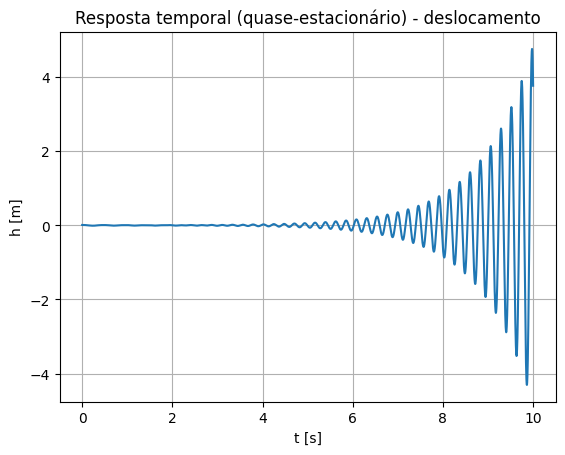

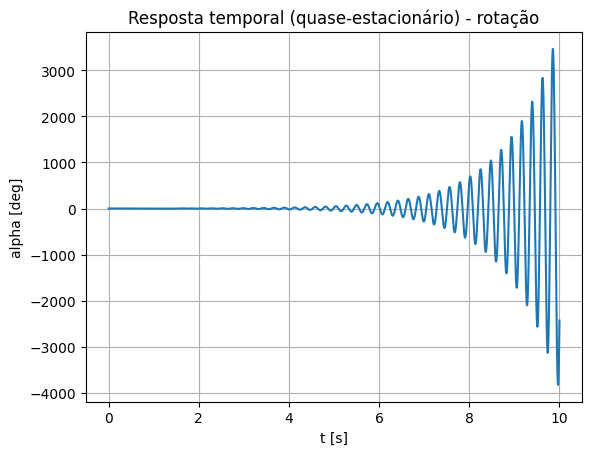


=== NÃO-ESTACIONÁRIO (k=0.25 fixo) ===
Theodorsen C(k): 0.692553-0.185248j  => F=0.692553, G=-0.185248
Autovalores (sigma, omega, f[Hz]) ordenados por f:
sigma=-0.2635, omega=+13.2962 rad/s, f=2.116 Hz
sigma=-0.2635, omega=-13.2962 rad/s, f=2.116 Hz
sigma=-0.3357, omega=+28.3348 rad/s, f=4.510 Hz
sigma=-0.3357, omega=-28.3348 rad/s, f=4.510 Hz

Discussão (não-estacionário):
- Com Theodorsen, a força tem defasagem: isso altera amortecimento e frequência.
- Modos ficam mais 'acoplados' (h e α aparecem misturados nos autovetores).


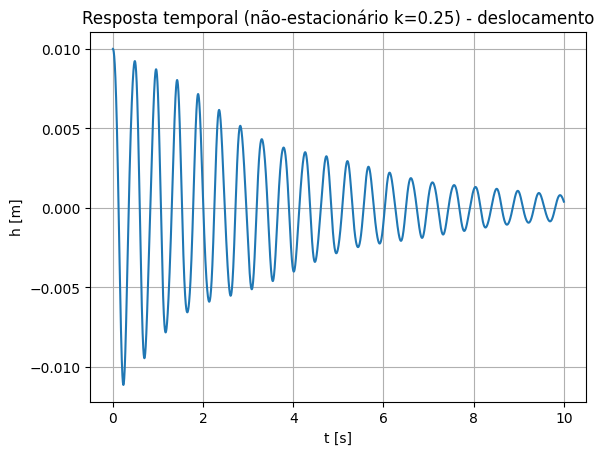

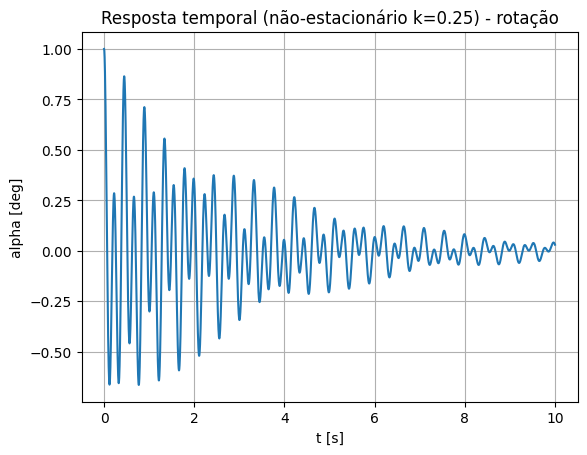

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import solve_ivp
from scipy.special import hankel2

# =========================
# Dados (PDF)
# =========================
V = 35.0
wh = 2.1030 * 2*np.pi
wa = 4.3761 * 2*np.pi
Xcg = 0.42
Xce = 0.33
Izz = 9.21
b = 0.5
c = 2*b
m = 164.42
rho = 1.225

# (Se não foi dado explicitamente na lista, em geral usa-se cl_alpha = 2π para aerofólio fino)
cl_alpha = 2*np.pi

# =========================
# Derivados estruturais
# =========================
Kh = m * wh**2
Ka = Izz * wa**2

x_cg_ea = Xcg - Xce           # [m]
Salpha = m * x_cg_ea          # acoplamento inercial [kg*m]
a = (Xce - c/2)/b             # eixo elástico relativo ao meio da corda (em b)

# =========================
# Função de Theodorsen (complexa)
# =========================
def theodorsen(k):
    H1 = hankel2(1, k)
    H0 = hankel2(0, k)
    return H1 / (H1 + 1j*H0)

# k constante pedido
k_const = 0.25
Ck = theodorsen(k_const)
F = np.real(Ck)
G = np.imag(Ck)

# =========================
# Modelo aero quasi-estacionário (simples, padrão de aula)
# Lift ~ q*c*cl_alpha*( alpha + hdot/V + (0.5 - a)*b*alphadot/V )
# Momento (sobre eixo elástico) ~ -L * (a*b)  (modelo simplificado)
# =========================
q_dyn = 0.5 * rho * V**2

# Matrizes 2ª ordem: M qdd + C qd + K q = 0 , com q=[h, alpha]
# h em metros (positivo para baixo), alpha em rad

# Estrutural
M = np.array([[m, Salpha],
              [Salpha, Izz]], dtype=float)

C_struct = np.zeros((2,2))
K_struct = np.array([[Kh, 0.0],
                     [0.0, Ka]], dtype=float)

# Aerodinâmica quase-estacionária
# L = q*c*cl_a*( alpha + hdot/V + (0.5 - a)*b*alphadot/V )
# M_aero = -L*(a*b)  (braço ~ a*b, com sinal conforme convenção)
# Forças generalizadas: Qh = -L , Qalpha = M_aero

A0 = q_dyn * c * cl_alpha
L_alpha = A0
L_hdot  = A0 / V
L_adot  = A0 * (0.5 - a) * b / V

# Monta C_aero e K_aero a partir de Q = -[K_aero] q - [C_aero] qdot
# Qh = -L = -(L_alpha*alpha + L_hdot*hdot + L_adot*adot)
# Qalpha = M_aero = -L*(a*b)
# => Qalpha = -(a*b)*(L_alpha*alpha + L_hdot*hdot + L_adot*adot)

C_aero = np.array([[ L_hdot,  L_adot],
                   [ a*b*L_hdot, a*b*L_adot]], dtype=float)

K_aero = np.array([[ 0.0,   L_alpha],
                   [ 0.0, a*b*L_alpha]], dtype=float)

# Sistema quasi-estacionário:
C_qs = C_struct + C_aero
K_qs = K_struct + K_aero

# =========================
# State-space (1ª ordem) para modos e simulação
# x = [q; qdot]
# xdot = A x
# =========================
def state_matrix(M, C, K):
    Z = np.zeros_like(M)
    I = np.eye(M.shape[0])
    Minv = np.linalg.inv(M)
    A = np.block([
        [Z, I],
        [-Minv @ K, -Minv @ C]
    ])
    return A

A_qs = state_matrix(M, C_qs, K_qs)

# Autovalores/modos
eigvals_qs, eigvecs_qs = eig(A_qs)

# Frequências e amortecimento aproximados
# lambda = sigma ± i*omega  => f = omega/(2π)
def modal_info(eigvals):
    out = []
    for lam in eigvals:
        sigma = np.real(lam)
        omega = np.imag(lam)
        f = abs(omega)/(2*np.pi)
        out.append((sigma, omega, f))
    # ordena por frequência
    out.sort(key=lambda t: t[2])
    return out

info_qs = modal_info(eigvals_qs)

print("\n=== QUASE-ESTACIONÁRIO ===")
print("Autovalores (sigma, omega, f[Hz]) ordenados por f:")
for (sigma, omega, f) in info_qs:
    if f > 1e-6:
        print(f"sigma={sigma:+.4f}, omega={omega:+.4f} rad/s, f={f:.3f} Hz")

print("\nDiscussão (quase-estacionário):")
print("- Modos geralmente aparecem em pares complexos conjugados.")
print("- Se houver acoplamento h-α, os vetores próprios misturam ambos (modo 'complexo' no sentido de acoplado).")

# =========================
# Resposta temporal (quase-estacionário)
# condição inicial: deslocamento em h e alpha
# =========================
def simulate(A, x0, t_end=10.0, n=5000):
    def f(t, x): return A @ x
    t_eval = np.linspace(0, t_end, n)
    sol = solve_ivp(f, (0, t_end), x0, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    return sol.t, sol.y

# condição inicial: h=0.01 m, alpha=1 deg, velocidades zero
x0 = np.array([0.01, np.deg2rad(1.0), 0.0, 0.0], dtype=float)
t, y = simulate(A_qs, x0, t_end=10.0)

h = y[0, :]
alpha = y[1, :]

plt.figure()
plt.plot(t, h)
plt.xlabel("t [s]")
plt.ylabel("h [m]")
plt.title("Resposta temporal (quase-estacionário) - deslocamento")
plt.grid(True)

plt.figure()
plt.plot(t, np.rad2deg(alpha))
plt.xlabel("t [s]")
plt.ylabel("alpha [deg]")
plt.title("Resposta temporal (quase-estacionário) - rotação")
plt.grid(True)
plt.show()

# =========================
# NÃO-ESTACIONÁRIO (k constante)
# Ideia: usar C(k)=F+iG como correção de fase/amplitude nos termos circulatórios.
# Para ter ODE real, aproximamos:
#   termo "F" entra como ganho de rigidez/aero
#   termo "G" entra como ganho efetivo de amortecimento via ω_ref = k V / b
# (aproximação comum quando se fixa k)
# =========================
omega_ref = k_const * V / b  # pois k = ω b / V

# Ajuste simples: multiplica os termos circulatórios por F e cria amortecimento adicional proporcional a G
# Aqui vamos aplicar isso ao termo de "alpha" (rigidez) e ao termo de "alpha_dot" (amortecimento)
# mantendo o resto igual ao QS.
K_aero_un = K_aero * F
C_aero_un = C_aero * F

# Termo extra de fase (G): aproxima como contribuição proporcional a omega_ref
# (essa é uma forma prática de injetar o efeito imaginário em um modelo real)
C_phase = K_aero * (G / omega_ref)  # porque iω * (G/ω) ~ derivada

C_un = C_struct + (C_aero_un + C_phase)
K_un = K_struct + K_aero_un

A_un = state_matrix(M, C_un, K_un)

eigvals_un, eigvecs_un = eig(A_un)
info_un = modal_info(eigvals_un)

print("\n=== NÃO-ESTACIONÁRIO (k=0.25 fixo) ===")
print(f"Theodorsen C(k): {Ck:.6f}  => F={F:.6f}, G={G:.6f}")
print("Autovalores (sigma, omega, f[Hz]) ordenados por f:")
for (sigma, omega, f) in info_un:
    if f > 1e-6:
        print(f"sigma={sigma:+.4f}, omega={omega:+.4f} rad/s, f={f:.3f} Hz")

print("\nDiscussão (não-estacionário):")
print("- Com Theodorsen, a força tem defasagem: isso altera amortecimento e frequência.")
print("- Modos ficam mais 'acoplados' (h e α aparecem misturados nos autovetores).")

# Resposta temporal não-estacionária
t2, y2 = simulate(A_un, x0, t_end=10.0)
h2 = y2[0, :]
alpha2 = y2[1, :]

plt.figure()
plt.plot(t2, h2)
plt.xlabel("t [s]")
plt.ylabel("h [m]")
plt.title("Resposta temporal (não-estacionário k=0.25) - deslocamento")
plt.grid(True)

plt.figure()
plt.plot(t2, np.rad2deg(alpha2))
plt.xlabel("t [s]")
plt.ylabel("alpha [deg]")
plt.title("Resposta temporal (não-estacionário k=0.25) - rotação")
plt.grid(True)
plt.show()
